# python으로 weight 계산한거 맞나 보기
1d_sst랑 ssta로 확인해보자

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../../Data/1degree/'
sub1 = xr.open_dataarray(path+'1d_sst.nc')
sub2 = xr.open_dataarray(path+'ssta.nc')

test1 = xr.open_dataarray(path+'1d_sst_flmean.nc').squeeze()
test2 = xr.open_dataarray(path+'ssta_flmean.nc').squeeze()

cdow = xr.open_dataarray(path+'1d_weights.nc')

In [3]:
cdow

<xarray.DataArray 'cell_weights' (lat: 181, lon: 360)> Size: 521kB
[65160 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0

In [4]:
def cal_weights(lat):
    weights = np.cos(np.deg2rad(lat))
    weights /= weights.sum()
    weights.name = "weights"
    
    return weights

In [5]:
def cal_weights_hard(lat, lon, str_lat='lat', str_lon='lon'):
    # Define the Earth's radius (in meters)
    R = 6371000

    # Calculate the latitude and longitude resolution (in radians)
    lat_res = np.deg2rad(lat.diff('lat')).mean().item()
    lon_res = np.deg2rad(lon.diff('lon')).mean().item()

    # Calculate the area weights
    area_weights = (R**2 * lat_res * lon_res * np.cos(np.deg2rad(lat)))
    
    # Normalize the weights so they sum to 1
    normalized_weights = area_weights / area_weights.sum()
    normalized_weights.name = "weights"
    
    return normalized_weights


In [6]:
sresult1 = sub1.weighted(cal_weights(sub1.lat)).mean(("lon", "lat"))
hresult1 = sub1.weighted(cal_weights_hard(sub1.lat, sub1.lon)).mean(("lon", "lat"))
cwresult1 = sub1.weighted(cdow).mean(("lon", "lat"))

sresult2 = sub2.weighted(cal_weights(sub2.lat)).mean(("lon", "lat"))
hresult2 = sub2.weighted(cal_weights_hard(sub2.lat, sub2.lon)).mean(("lon", "lat"))
cwresult2 = sub2.weighted(cdow).mean(("lon", "lat"))

In [53]:
cwresult1

<xarray.DataArray 'sst' (time: 511)> Size: 4kB
array([17.99724336, 17.85770633, 17.73584324, 17.88183941, 18.04215942,
       18.09288479, 18.13018559, 18.07789106, 18.01303078, 17.88371357,
       17.89409367, 17.94879285, 17.9495253 , 17.85672758, 17.78540121,
       17.92686052, 18.15905397, 18.30389698, 18.28158429, 18.19791953,
       18.0759398 , 18.02318197, 17.97722031, 18.05538214, 18.00418662,
       17.84255264, 17.78151313, 17.85788287, 18.02164119, 18.17837095,
       18.16453707, 18.09343793, 17.96471134, 17.87740848, 17.91972078,
       18.00872985, 18.01176097, 17.75033351, 17.71575352, 17.76033613,
       17.9228958 , 18.05772052, 18.06778315, 17.95179367, 17.8644983 ,
       17.77651763, 17.87159221, 17.87394106, 17.8577808 , 17.72761967,
       17.63630504, 17.73210872, 17.86402334, 18.04450661, 18.08316336,
       18.00688974, 17.90667346, 17.89735717, 17.90444018, 17.94765406,
       17.94778387, 17.84485171, 17.77209359, 17.81418066, 18.00140352,
       18.15851565, 18.24342118, 18.15076951, 18.03743104, 17.9506898 ,
       18.07524415, 18.16399244, 18.13498347, 17.94288145, 17.9135153 ,
       17.96713649, 18.17851671, 18.33432238, 18.30930875, 18.2053013 ,
       18.05008851, 17.98355252, 17.98401185, 18.05426018, 17.98255233,
       17.82940095, 17.67405687, 17.72314513, 17.94677849, 18.06897145,
       18.11383783, 18.05940909, 17.97631959, 17.89198108, 18.00717016,
       18.04656546, 17.99773178, 17.80714957, 17.77529063, 17.83377588,
...
       18.6854178 , 18.53970422, 18.51708094, 18.55449204, 18.62405562,
       18.54474697, 18.36593811, 18.21104229, 18.31996133, 18.52788566,
       18.70603147, 18.7318757 , 18.67109748, 18.50292756, 18.44015288,
       18.53334878, 18.62471144, 18.49166204, 18.31591019, 18.2187249 ,
       18.22662747, 18.41499841, 18.53547346, 18.62282101, 18.57180462,
       18.47111815, 18.35432054, 18.37906218, 18.49930145, 18.4759472 ,
       18.37210365, 18.29974895, 18.36298408, 18.51939845, 18.66896529,
       18.7415428 , 18.64839536, 18.51253539, 18.47641275, 18.54811276,
       18.66463995, 18.53698104, 18.38522516, 18.30499921, 18.3855944 ,
       18.60080279, 18.72996951, 18.78538335, 18.70551886, 18.55820059,
       18.47477694, 18.59842923, 18.70982399, 18.58614791, 18.39255935,
       18.26230145, 18.26936343, 18.41800772, 18.58004853, 18.64545174,
       18.58859347, 18.51199566, 18.45790659, 18.55926027, 18.62372946,
       18.56972704, 18.39732124, 18.30393057, 18.29333943, 18.52798178,
       18.64589413, 18.68409186, 18.59987463, 18.49201443, 18.4783341 ,
       18.52581617, 18.63579254, 18.56175372, 18.3753662 , 18.30596903,
       18.40168668, 18.54146396, 18.70696081, 18.8269265 , 18.82927902,
       18.69655122, 18.67977445, 18.82213786, 18.95530619, 18.87408433,
       18.6835084 , 18.61028546, 18.67018587, 18.87866635, 18.96180375,
       18.97102398])
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2024-03-01

In [45]:
test1.values

array([17.997244, 17.857706, 17.735844, 17.88184 , 18.04216 , 18.092884,
       18.130186, 18.07789 , 18.013031, 17.883713, 17.894094, 17.948793,
       17.949526, 17.856728, 17.7854  , 17.92686 , 18.159054, 18.303898,
       18.281584, 18.19792 , 18.07594 , 18.023182, 17.97722 , 18.055382,
       18.004187, 17.842552, 17.781513, 17.857883, 18.02164 , 18.178371,
       18.164537, 18.093437, 17.964712, 17.877409, 17.919722, 18.00873 ,
       18.01176 , 17.750334, 17.715754, 17.760336, 17.922895, 18.05772 ,
       18.067783, 17.951794, 17.864498, 17.776518, 17.871592, 17.873941,
       17.85778 , 17.72762 , 17.636305, 17.73211 , 17.864023, 18.044506,
       18.083164, 18.00689 , 17.906673, 17.897358, 17.90444 , 17.947655,
       17.947784, 17.844852, 17.772093, 17.81418 , 18.001404, 18.158516,
       18.243422, 18.15077 , 18.037432, 17.95069 , 18.075245, 18.163992,
       18.134983, 17.94288 , 17.913515, 17.967136, 18.178516, 18.334322,
       18.309309, 18.205301, 18.050089, 17.983553, 

In [46]:
sresult1.values

array([17.99756568, 17.85802467, 17.73615775, 17.88215939, 18.04248678,
       18.09321339, 18.13051061, 18.07821054, 18.01334725, 17.88402904,
       17.89440817, 17.94911097, 17.94983681, 17.85703622, 17.78571201,
       17.92717832, 18.15938181, 18.30422806, 18.2819105 , 18.19823963,
       18.07625684, 18.02349654, 17.97752909, 18.055703  , 18.00450439,
       17.84286795, 17.78182815, 17.85820168, 18.02196787, 18.17870094,
       18.16486134, 18.09375731, 17.9650279 , 17.87772633, 17.92003283,
       18.00904842, 18.012074  , 17.75064366, 17.71606531, 17.76065225,
       17.92322015, 18.0580499 , 18.06810795, 17.95211055, 17.86481379,
       17.77682867, 17.87189748, 17.87425548, 17.85809572, 17.72793362,
       17.63661729, 17.73242533, 17.86434632, 18.04483377, 18.08348798,
       18.00720685, 17.90698912, 17.89767599, 17.90475375, 17.94797717,
       17.94810484, 17.84516722, 17.7724065 , 17.81449625, 18.00172621,
       18.15884362, 18.243746  , 18.15108915, 18.03774611, 17.95

In [44]:
hresult1.values

array([17.99756568, 17.85802467, 17.73615775, 17.88215939, 18.04248678,
       18.09321339, 18.13051061, 18.07821054, 18.01334725, 17.88402904,
       17.89440817, 17.94911097, 17.94983681, 17.85703622, 17.78571201,
       17.92717832, 18.15938181, 18.30422806, 18.2819105 , 18.19823963,
       18.07625684, 18.02349654, 17.97752909, 18.055703  , 18.00450439,
       17.84286795, 17.78182815, 17.85820168, 18.02196787, 18.17870094,
       18.16486134, 18.09375731, 17.9650279 , 17.87772633, 17.92003283,
       18.00904842, 18.012074  , 17.75064366, 17.71606531, 17.76065225,
       17.92322015, 18.0580499 , 18.06810795, 17.95211055, 17.86481379,
       17.77682867, 17.87189748, 17.87425548, 17.85809572, 17.72793362,
       17.63661729, 17.73242533, 17.86434632, 18.04483377, 18.08348798,
       18.00720685, 17.90698912, 17.89767599, 17.90475375, 17.94797717,
       17.94810484, 17.84516722, 17.7724065 , 17.81449625, 18.00172621,
       18.15884362, 18.243746  , 18.15108915, 18.03774611, 17.95

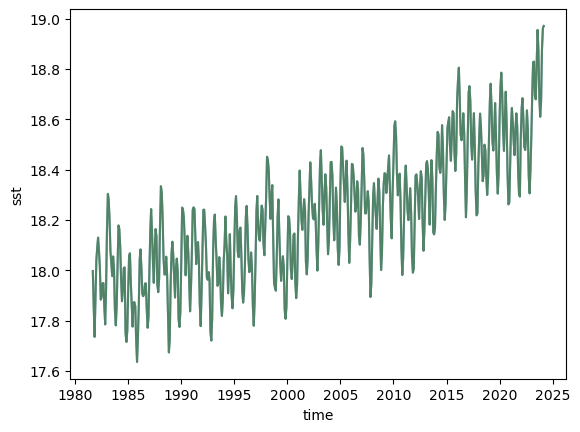

In [7]:
test1.plot()
sresult1.plot(alpha=0.3)
hresult1.plot(alpha=0.3)

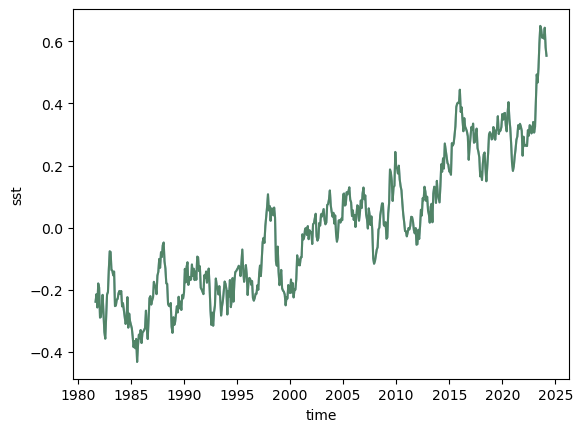

In [8]:
test2.plot()
sresult2.plot(alpha=0.3)
hresult2.plot(alpha=0.3)